# **HBL STOCK PREDICTION FROM 2025 TO 2027 (PSX)**

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [101]:
df = pd.read_csv("/content/psx_data_20211210_to_20241210.csv")
df.head()

,Date,Symbol,Open,High,Low,Close
0,2021-12-01,WTL,2.12,2.22,2.12,2.19
1,2021-12-01,WTL,2.12,2.22,2.12,2.19
2,2021-12-02,WTL,2.25,2.25,1.95,2.01
3,2021-12-02,WTL,2.25,2.25,1.95,2.01
4,2021-12-03,WTL,2.01,2.14,1.95,2.05


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49820 entries, 0 to 49819
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    49820 non-null  object 
 1   Symbol  49820 non-null  object 
 2   Open    49820 non-null  float64
 3   High    49820 non-null  float64
 4   Low     49820 non-null  float64
 5   Close   49820 non-null  float64
dtypes: float64(4), object(2)
memory usage: 2.3+ MB


In [103]:
print(f'Total number of rows are {df.shape[0]} and total number of columns are {df.shape[1]}.')

Total number of rows are 49820 and total number of columns are 6.


In [104]:
print("Total number of null values in each column:")
df.isnull().sum()

Total number of null values in each column:


,0
Date,0
Symbol,0
Open,0
High,0
Low,0
Close,0


In [105]:
print("Statistical information:")
df.describe()

Statistical information:


,Open,High,Low,Close
count,49820.000000,49820.000000,49820.000000,49820.000000
mean,38.937193,39.631940,38.263455,40.302899
std,48.731898,49.585236,47.894553,48.916828
min,0.000000,0.000000,0.000000,0.800000
25%,6.490000,6.660000,6.330000,7.030000
50%,16.240000,16.600000,15.965000,17.340000
75%,59.917500,60.982500,58.500000,62.475000
max,429.950000,443.900000,422.000000,426.110000


In [106]:
# Filtering out data for HBL

hbl_df = df[df['Symbol']=='HBL']
hbl_df = hbl_df.sort_values(by="Date")
hbl_df

,Date,Symbol,Open,High,Low,Close
36757,2021-12-01,HBL,125.00,125.50,122.11,124.67
36758,2021-12-01,HBL,125.00,125.50,122.11,124.67
36759,2021-12-02,HBL,123.99,124.04,117.50,119.52
36760,2021-12-02,HBL,123.99,124.04,117.50,119.52
36761,2021-12-03,HBL,118.90,124.23,117.15,123.20
...,...,...,...,...,...,...
37519,2024-11-25,HBL,145.20,154.69,145.00,147.18
37520,2024-11-26,HBL,147.74,161.90,144.10,154.51
37521,2024-11-27,HBL,159.97,169.96,158.50,169.96
37522,2024-11-28,HBL,175.26,182.40,171.75,177.44


In [107]:
#Converting the 'Date' column to datetime format allows time-based operations like plotting and indexing.
hbl_df['Date'] = pd.to_datetime(hbl_df['Date'])
hbl_df['Date']

,Date
36757,2021-12-01
36758,2021-12-01
36759,2021-12-02
36760,2021-12-02
36761,2021-12-03
...,...
37519,2024-11-25
37520,2024-11-26
37521,2024-11-27
37522,2024-11-28


In [108]:
print("The datatype of Date got changed from object: ")
hbl_df.dtypes

The datatype of Date got changed from object: 


,0
Date,datetime64[ns]
Symbol,object
Open,float64
High,float64
Low,float64
Close,float64


In [109]:
# Adding Days column

hbl_df['Days'] = (hbl_df['Date']- hbl_df['Date'].min()).dt.days
hbl_df.head()

,Date,Symbol,Open,High,Low,Close,Days
36757,2021-12-01,HBL,125.00,125.50,122.11,124.67,0
36758,2021-12-01,HBL,125.00,125.50,122.11,124.67,0
36759,2021-12-02,HBL,123.99,124.04,117.50,119.52,1
36760,2021-12-02,HBL,123.99,124.04,117.50,119.52,1
36761,2021-12-03,HBL,118.90,124.23,117.15,123.20,2


In [110]:
# 7-day moving average of the 'Close' column
hbl_df["MA_7"] = hbl_df["Close"].rolling(window=7).mean()

In [111]:
# Add 7-day Exponential Moving Average (EMA)
hbl_df["EMA_7"] = hbl_df["Close"].ewm(span=7, adjust=False).mean()

In [112]:
# Normalizing the features
scaler = StandardScaler()
hbl_df[["Days", "Open", "EMA_7", 'Close']] = scaler.fit_transform(hbl_df[["Days", "Open", "EMA_7", 'Close']])

In [113]:
hbl_df.tail(15)

,Date,Symbol,Open,High,Low,Close,Days,MA_7,EMA_7
37509,2024-11-11,HBL,1.325756,130.94,127.01,1.170877,1.683813,130.540000,1.340289
37510,2024-11-12,HBL,1.193999,128.00,125.00,1.084043,1.686891,129.334286,1.284304
37511,2024-11-13,HBL,1.081960,125.90,124.40,1.077808,1.689969,128.381429,1.240719
37512,2024-11-14,HBL,1.081960,130.99,125.25,1.308477,1.693048,128.394286,1.267055
37513,2024-11-15,HBL,1.328445,135.00,131.00,1.457209,1.696126,128.744286,1.324865
37514,2024-11-18,HBL,1.471855,139.60,132.05,1.656706,1.705361,129.997143,1.419270
37515,2024-11-19,HBL,1.675766,141.00,137.60,1.653144,1.708439,131.328571,1.489163
37516,2024-11-20,HBL,1.664562,140.98,133.51,1.467006,1.711518,132.278571,1.493952
37517,2024-11-21,HBL,1.467373,135.90,133.51,1.503076,1.714596,133.622857,1.506774
37518,2024-11-22,HBL,1.530115,148.39,135.50,1.939476,1.717674,136.387143,1.628058


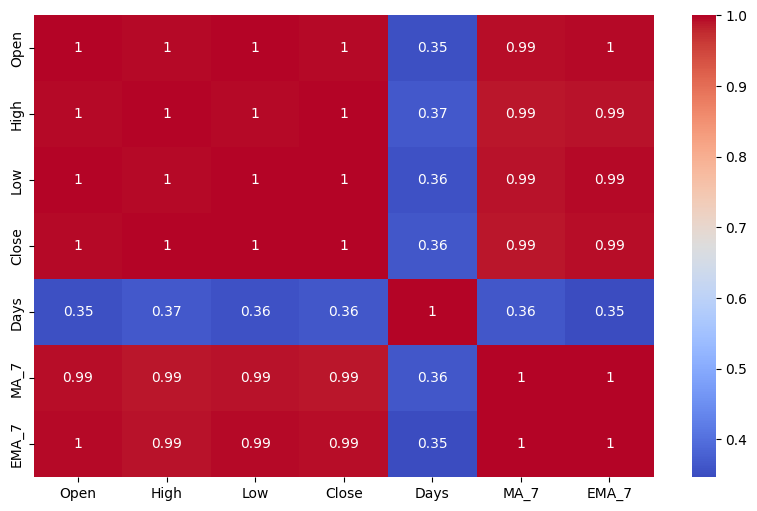

In [114]:
# Creating heatmap for corelation

numeric_df = hbl_df.select_dtypes(include='number')

# Heat map
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(),annot=True, cmap='coolwarm')
plt.show()


In [115]:
# Feature selection
X = hbl_df[['Open','Days','EMA_7']]
y = hbl_df[['Close']]

In [116]:
# Train test split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [117]:
# Model
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [118]:
y_predict = lr.predict(X_test)

In [119]:
# Evaluation of the model's performance

mse = mean_squared_error(y_test,y_predict)
r_2_score = r2_score(y_test,y_predict)

print(f'Mean squared error = {mse}.\nr2 Score = {r_2_score}.')

Mean squared error = 0.00538688766106812.
r2 Score = 0.99433902905029.


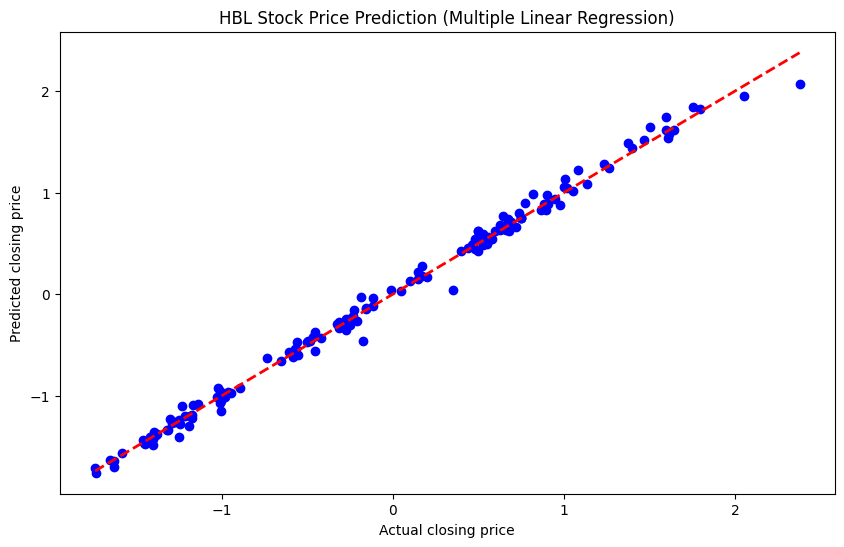

In [120]:
# Scatter plot Actual vs predicted

plt.figure(figsize=(10,6))
plt.scatter(y_test,y_predict, color='blue', label='Acual Vs predicted')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()], 'r--', lw=2, label='Ideal Line')
plt.title("HBL Stock Price Prediction (Multiple Linear Regression)")
plt.xlabel('Actual closing price')
plt.ylabel("Predicted closing price")
plt.show()

In [121]:
# Prediction for the next three years
from datetime import timedelta

last_date = hbl_df['Date'].max()
future_date = pd.date_range(start=last_date + timedelta(days=1), periods=3*365, freq='D')

In [122]:
# Calculating number of days

start_date = hbl_df['Date'].min()
future_days = (future_date-start_date).days

In [123]:
last_open = hbl_df.iloc[-1,2]
future_open = [last_open] * len(future_days)

In [124]:
# Step 4: Copy last EMA_7 (or simulate forward using alpha if needed)
last_ema = hbl_df['EMA_7'].iloc[-1]
future_ema = [last_ema] * future_days

In [125]:
future_df = pd.DataFrame({
     'Open': future_open,
    'Days': future_days,
      'EMA_7': future_ema
  })


In [126]:
future_df

,Open,Days,EMA_7
0,3.434776,1095,3084.599263
1,3.434776,1096,3087.416249
2,3.434776,1097,3090.233235
3,3.434776,1098,3093.050220
4,3.434776,1099,3095.867206
...,...,...,...
1090,3.434776,2185,6155.113598
1091,3.434776,2186,6157.930584
1092,3.434776,2187,6160.747570
1093,3.434776,2188,6163.564555


In [127]:
future_prediction = lr.predict(future_df)
future_prediction = future_prediction.flatten()

In [128]:
predicted_df = pd.DataFrame({
    'Date':future_date,
    'Predicted Closing Price': future_prediction
})

predicted_df

,Date,Predicted Closing Price
0,2024-11-30,451.385188
1,2024-12-01,451.794734
2,2024-12-02,452.204279
3,2024-12-03,452.613825
4,2024-12-04,453.023370
...,...,...
1090,2027-11-25,897.789731
1091,2027-11-26,898.199277
1092,2027-11-27,898.608822
1093,2027-11-28,899.018368


In [129]:
predicted_df.to_csv("Hbl stock price prediction.csv",index=False)

In [130]:
from google.colab import files
files.download('Hbl stock price prediction.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>